# Assignment 3: K-means clustering

## Description

In this assignment, you are going to implement k-means algorithm on MNIST, given the MNIST dataset array of shape 70000\*784, you have to output an array of 70000 assigned cluster indices.

## Requirement

The only requirement is that the mean L2 distance from the data points to the corresponding cluster centroids should be less than a certain value. Your k-means should iteratively minimize this objective.

To run the algorithm step-by-step, you have to implement k-means as a **generator**. The following is a reference of what Python generator is: [https://stackabuse.com/python-generators/](https://stackabuse.com/python-generators/).

## Scoring and Submission

Your assignment score will be printed out while running k-means! There is no time limit this time, after you click *Runtime / Restart and run all* and have your ideal score printed out, you can download this notebook as `XXXXXXX.ipynb` and upload it to E3, where `XXXXXXX` is your student ID.

- You have to "restart and run all", and **keep the output of the last cell when you download this notebook**.
- You only need to submit the `.ipynb` file to E3, do not zip it!

In [1]:
###########################
# DO NOT CHANGE THIS CELL #
###########################

import os, pickle
import numpy as np
from PIL import Image
from IPython.display import display


def load_mnist():
  if not os.path.exists('mnist.pkl'):
    url = 'https://lab.djosix.com/mnist.pkl.gz'
    assert os.system(f'wget -O mnist.pkl.gz {url}') == 0
    assert os.system('gunzip mnist.pkl.gz') == 0

  with open('mnist.pkl', 'rb') as f:
    return pickle.load(f)


def sample_from_clusters(X, cluster_indices, num_clusters, k=32):
  """
  Sample k MNIST images from each cluster, one row per cluster, and form an image.
  """

  rows = []

  for i in range(num_clusters):
    row = X[np.where(cluster_indices == i)]
    row = row[np.random.choice(row.shape[0], size=k, replace=True)]
    row = row.reshape(-1, 28, 28) # each datapoint is an 28x28 image
    row = np.concatenate(row, 1)

    rows.append(row) # sampled images
    rows.append(np.full([1, row.shape[1]], 255, dtype=np.uint8)) # white line

  rows = np.concatenate(rows, 0)

  return Image.fromarray(rows)


def compute_mean_distance(X, cluster_indices, num_clusters):
  """
  Compute mean L2 distance from data points to their cluster centroids.
  """
  assert X.shape[0] == cluster_indices.shape[0], 'size not matched'

  total = np.zeros([num_clusters, X.shape[1]])
  count = np.zeros([num_clusters])

  for x, c in zip(X, cluster_indices):
    total[c] += x
    count[c] += 1

  count[count == 0] = 1 # avoid zero division when there is nothing in a cluster
  means = total / count[:, np.newaxis]

  distances = np.sqrt(np.power(X - means[cluster_indices], 2).sum(1))
  return distances.mean()


def your_score(mean_distance):
  r = (mean_distance - 1575) / (1700 - 1575)
  return round(min(max(100 - 50 * r, 0), 100))

###########################
# DO NOT CHANGE THIS CELL #
###########################

## Implement your k-means

In [2]:
import numpy as np
import pandas as pd
import random

def distance_cal(x1,x2):
  return (sum((x1-x2)**2))**0.5

def closet_centroids(p,X):
  assign_centroids=[]
  for i in X:
    distance=[]
    for j in p:
      distance.append(distance_cal(i,j))
    assign_centroids.append(np.argmin(distance))
  return assign_centroids

def centroids_cal(clusters,X):
  new_centroid=[]
  x_df=pd.concat([pd.DataFrame(X),pd.DataFrame(clusters,columns=['cluster'])],axis=1)
  #print(x_df)
  for c in set(x_df['cluster']):
    current_clusters=x_df[ x_df['cluster'] == c][ x_df.columns[:-1]]
    cluster_mean=current_clusters.mean(axis=0)
    #print('cluster_mean',cluster_mean)
    new_centroid.append(cluster_mean)
  new_centroid=np.array(new_centroid)
  return new_centroid

def kmeans(X, num_clusters):
  """
  Run K-means algorithm on X and yield assigned cluster indices at each steps.

  Args:
    X (np.ndarray):
      An array of size N*D, where N is the dataset size and D is the number of
      features. For MNIST, N is 70000 and D is 784 (28x28).
    num_clusters (int):
      Number of clusters.
  
  Yields:
    (np.ndarray)
      An integer array of cluster indices (start from 0) assigned to each
      data points, the array size should be N.
  """

  # NOTE: If your code includes randomness, please set a seed so that we can
  #       reproduce your result. You can try other seeds to get better score.
  np.random.seed(9816187)

  # TODO: Implement k-means here
  centroids=[]
  #max=np.max(X)
  #min=np.min(X)
  x0,x1,x2,x3,x4,x5,x6,x7,x8,x9=np.array_split(X,10)
  x_split=[]
  x_split.append(x0)
  x_split.append(x1)
  x_split.append(x2)
  x_split.append(x3)
  x_split.append(x4)
  x_split.append(x5)
  x_split.append(x6)
  x_split.append(x7)
  x_split.append(x8)
  x_split.append(x9)
  random.shuffle(x_split)
  for i in range(num_clusters):
    x_tmp=np.array(x_split[i])
    max=np.max(x_tmp)
    min=np.min(x_tmp)
    init_centroid=np.random.randint(min,max,size=X.shape[1])
   # print(X.shape[0])
    #print(np.random.randint(max,X.shape[0]))
    #print(init_centroid)
    init_centroid=np.array(init_centroid)
    #print(init_centroid.shape[0])
    centroids.append(init_centroid)
  centroids=np.array(centroids)
  #print(centroids)
  count=0
  while True:
    count=count+1
    #print(centroids)
    get_centroids=closet_centroids(centroids,X)
    get_centroids=np.array(get_centroids)
    centroids=centroids_cal(get_centroids,X)
    # Yield cluster index for each point in X
    #print(np.array(get_centroids).shape[0])
    yield (get_centroids)# change this
    if count==30:
      return
    # You should implement a stopping criteria


## Test your k-means

step: 0, mean_distance: 1794.1363274001112, score: 12


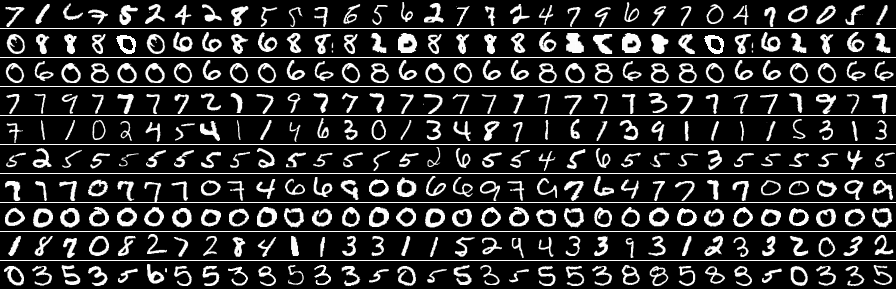

step: 1, mean_distance: 1663.349562768806, score: 65


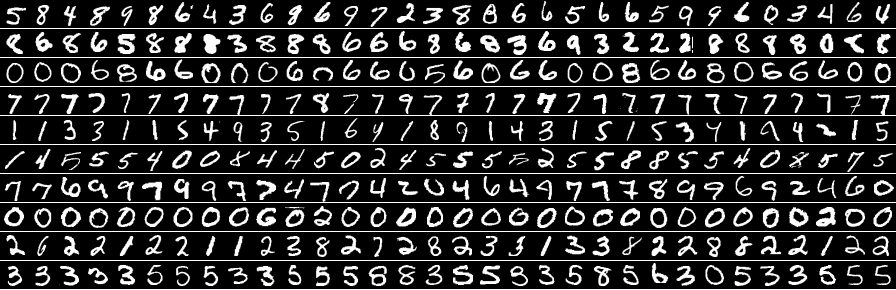

step: 2, mean_distance: 1622.4550306987041, score: 81


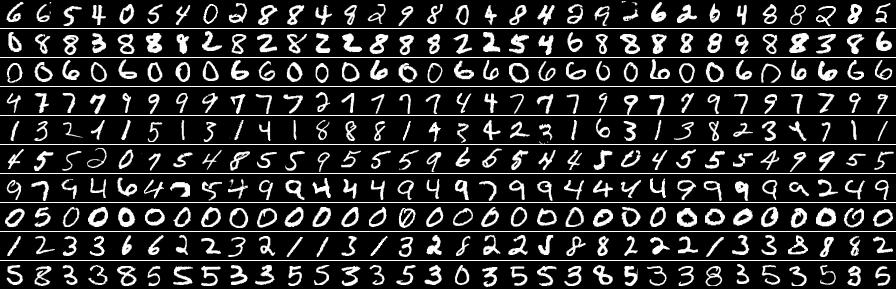

step: 3, mean_distance: 1604.8916932585055, score: 88


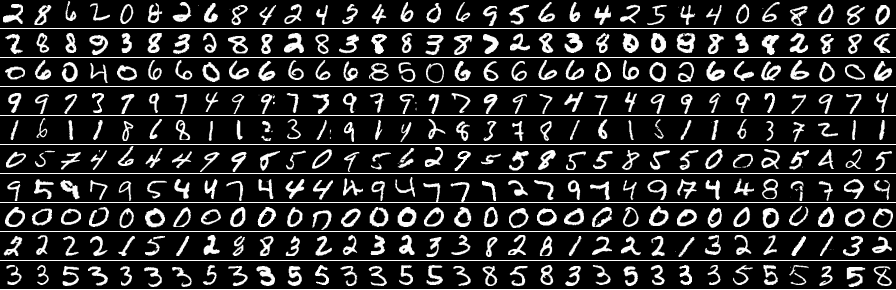

step: 4, mean_distance: 1594.338332816419, score: 92


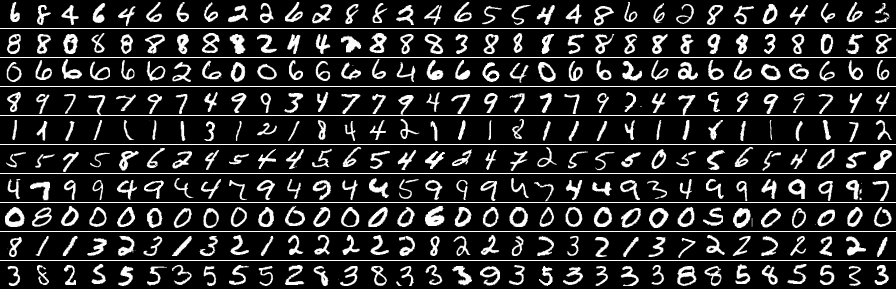

step: 5, mean_distance: 1587.367452573826, score: 95


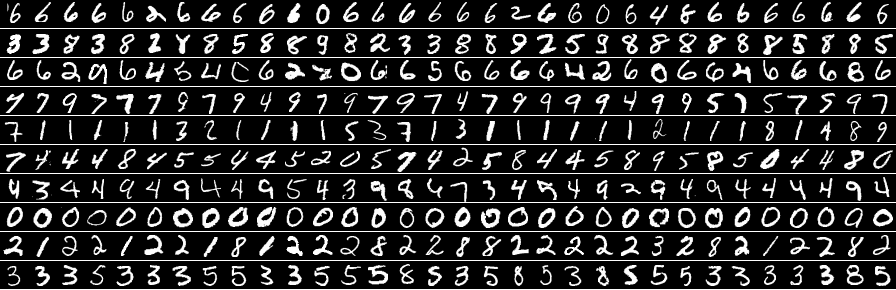

step: 6, mean_distance: 1583.7870174296618, score: 96


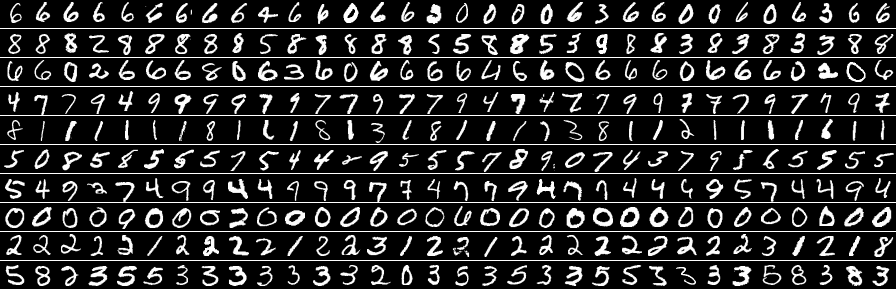

step: 7, mean_distance: 1582.0214865033781, score: 97


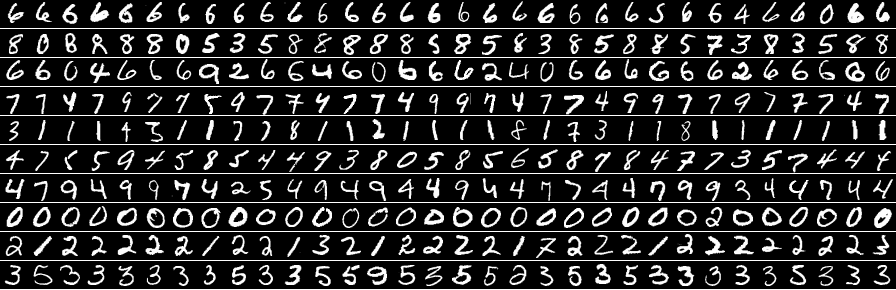

step: 8, mean_distance: 1581.1136282495204, score: 98


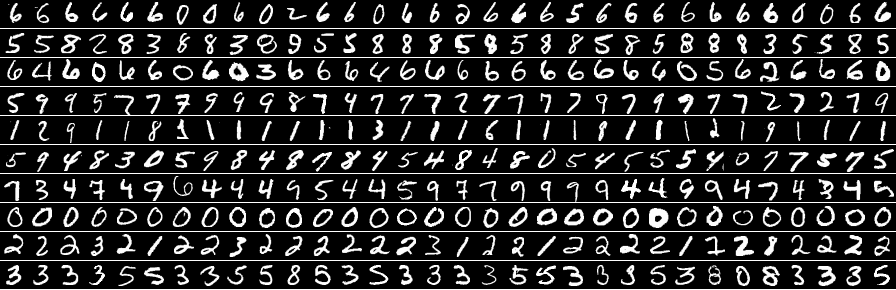

step: 9, mean_distance: 1580.505085427555, score: 98


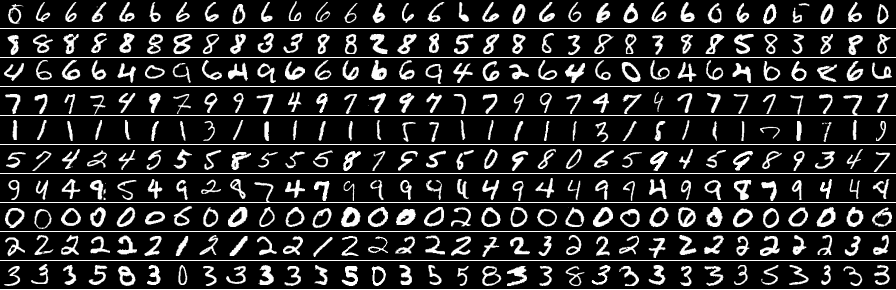

step: 10, mean_distance: 1580.0031092960473, score: 98


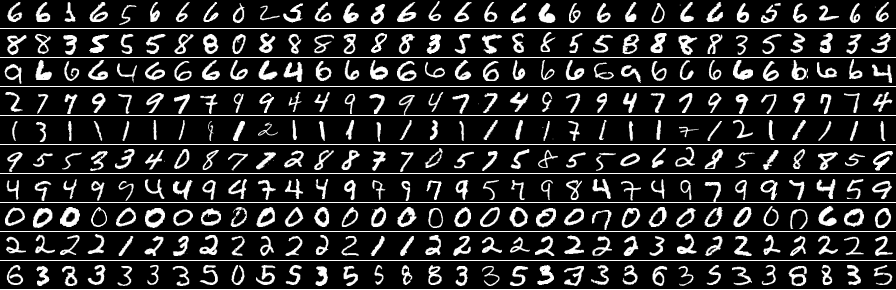

step: 11, mean_distance: 1579.5951062476393, score: 98


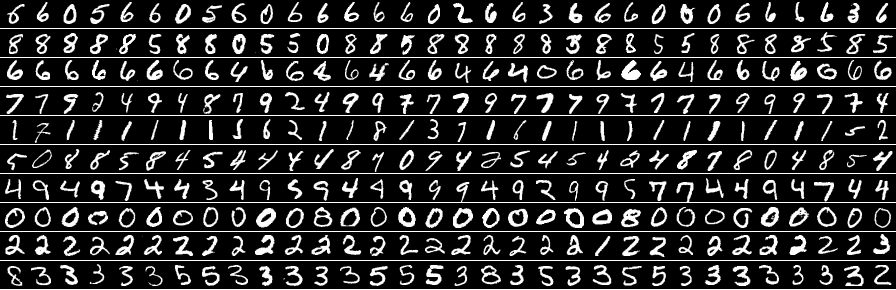

step: 12, mean_distance: 1579.3164752698206, score: 98


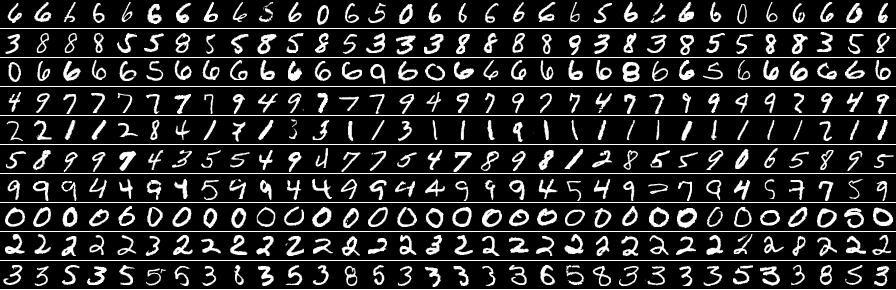

step: 13, mean_distance: 1579.1660565826026, score: 98


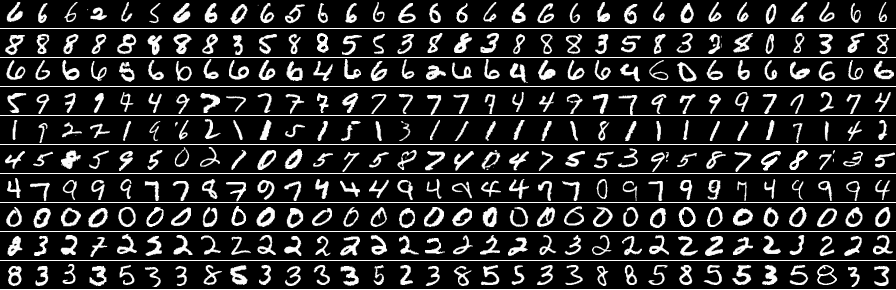

step: 14, mean_distance: 1579.0775281796932, score: 98


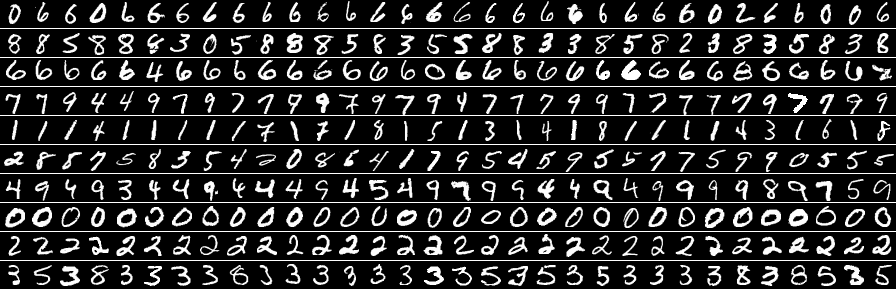

step: 15, mean_distance: 1579.0129465176517, score: 98


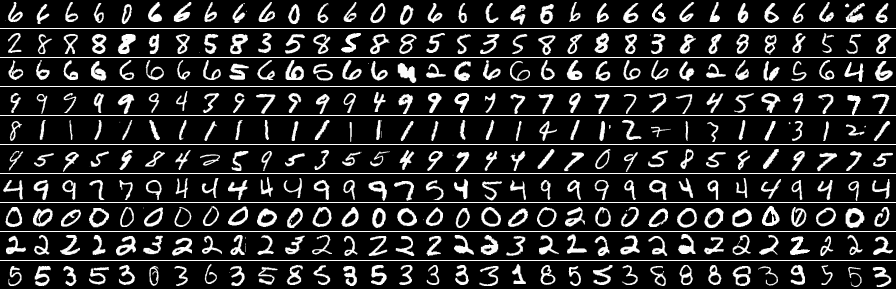

step: 16, mean_distance: 1578.9648031702718, score: 98


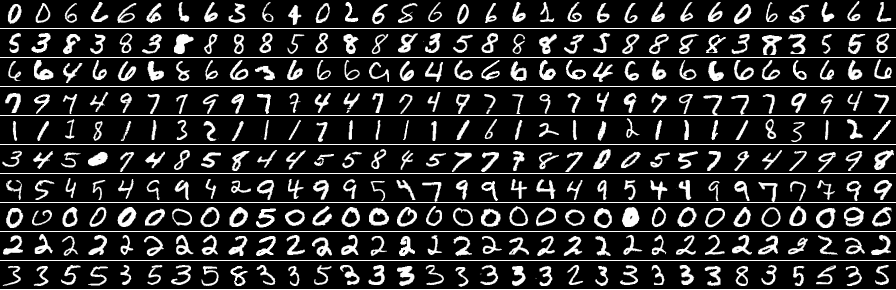

step: 17, mean_distance: 1578.9258659707496, score: 98


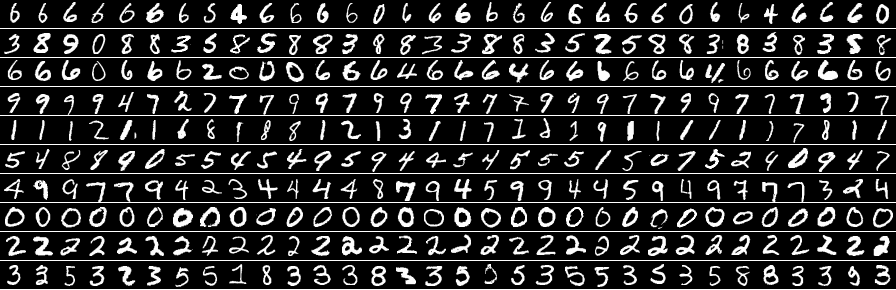

step: 18, mean_distance: 1578.8992035091942, score: 98


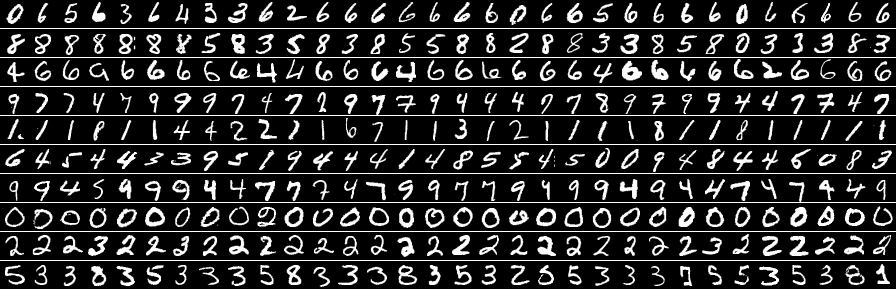

step: 19, mean_distance: 1578.8760127278667, score: 98


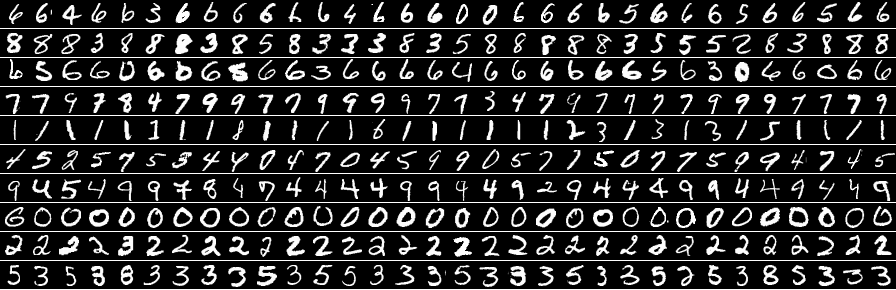

step: 20, mean_distance: 1578.8557356292881, score: 98


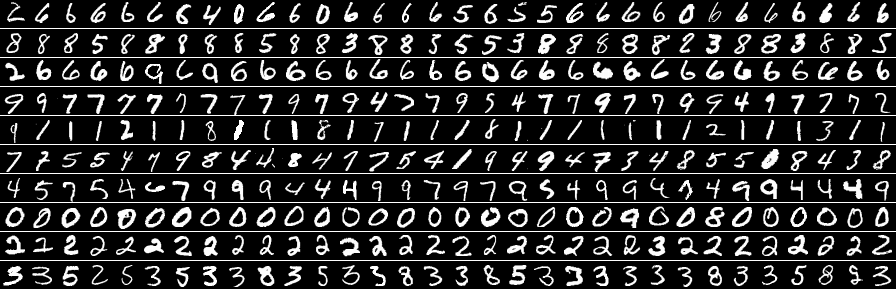

step: 21, mean_distance: 1578.832284252323, score: 98


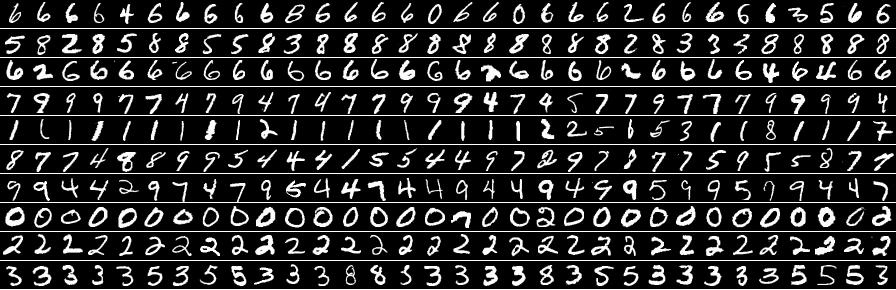

step: 22, mean_distance: 1578.8122755262762, score: 98


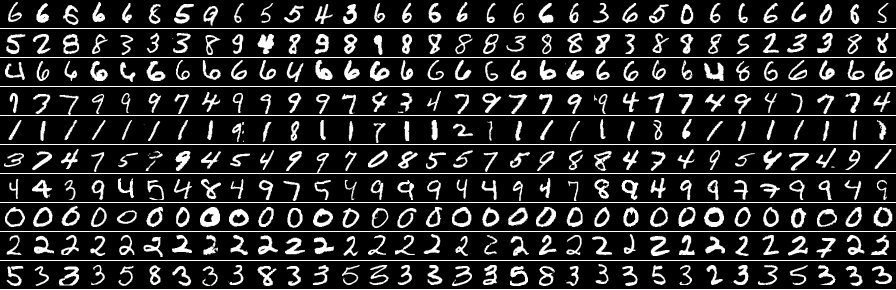

step: 23, mean_distance: 1578.789888795101, score: 98


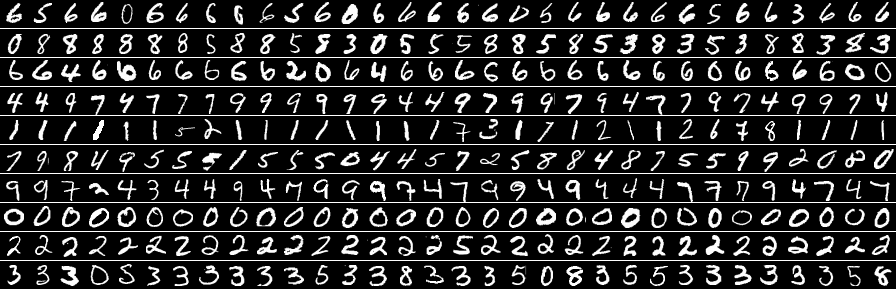

step: 24, mean_distance: 1578.7733211868099, score: 98


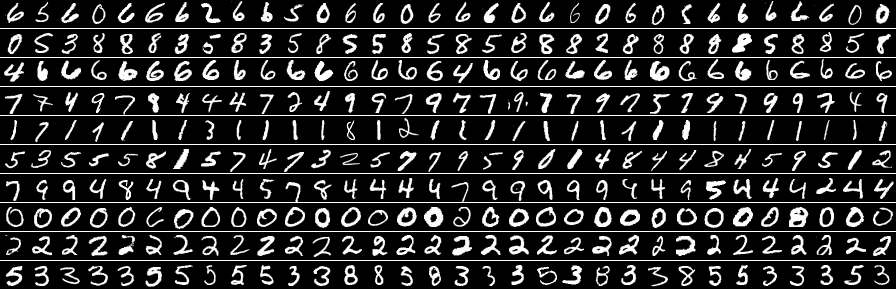

step: 25, mean_distance: 1578.7520055349546, score: 98


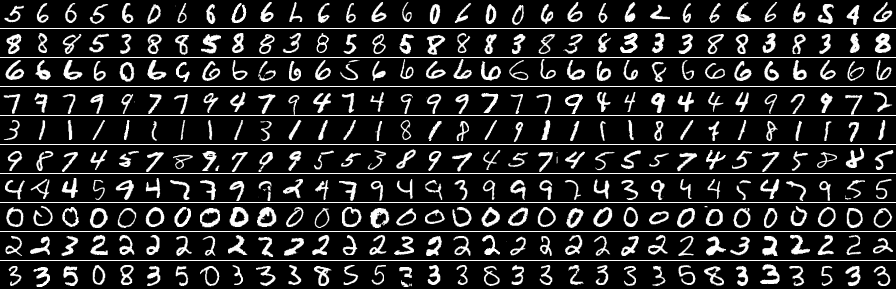

step: 26, mean_distance: 1578.7214869799034, score: 99


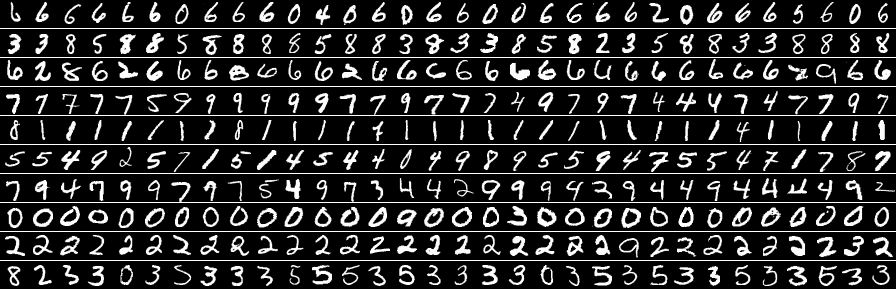

step: 27, mean_distance: 1578.6889433949286, score: 99


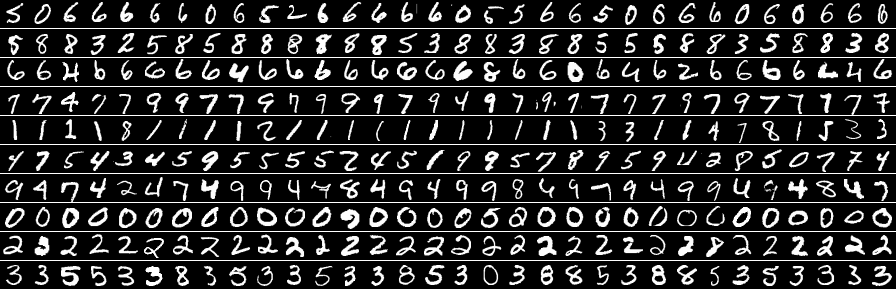

step: 28, mean_distance: 1578.6625681145656, score: 99


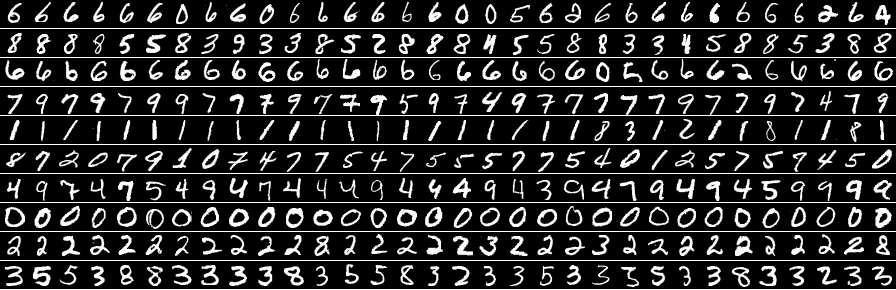

step: 29, mean_distance: 1578.6429527728383, score: 99


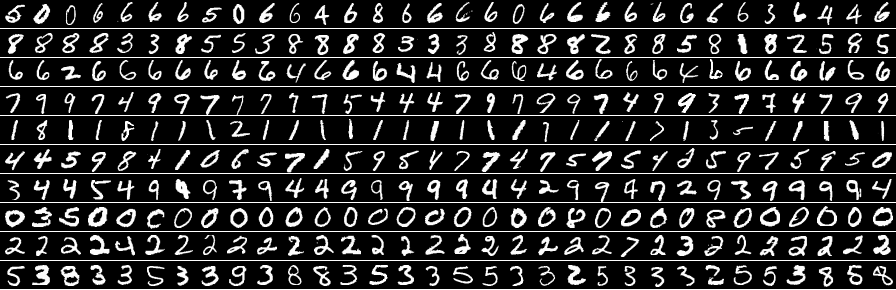

In [3]:
###########################
# DO NOT CHANGE THIS CELL #
###########################

X, _ = load_mnist()
num_clusters = 10

for i, cluster_indices in enumerate(kmeans(X, num_clusters)):
  mean_distance = compute_mean_distance(X, cluster_indices, num_clusters)
  score = your_score(mean_distance)
  print(f'step: {i}, mean_distance: {mean_distance}, score: {score}')
  
  display(sample_from_clusters(X, cluster_indices, num_clusters))

  if score == 100:
    break

###########################
# DO NOT CHANGE THIS CELL #
###########################